## 로지스틱 회귀
- 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘
- 즉, 로지스틱 회귀는 분류에 사용됨
- 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid)함수 최적선을 찾고
- 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것

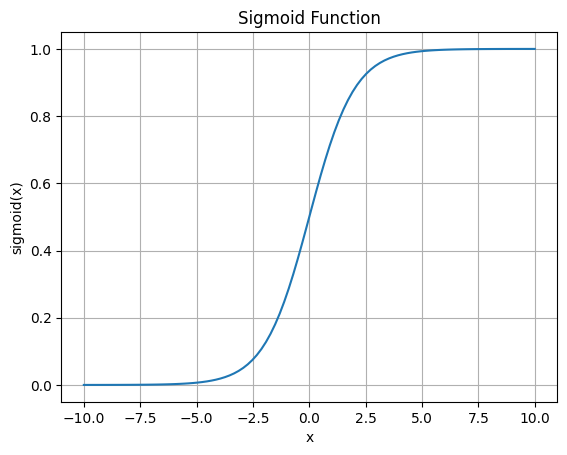

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x 범위 설정
x = np.linspace(-10, 10, 100)

# 시그모이드 함수 계산
y = sigmoid(x)

# 그래프
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

### 로지스틱 회귀 개요
- 선형회귀 방식을 분류에 적용한 알고리즘
- 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정
- 주로 이진분류에 사용(다중 클래스 분류에도 적용가능)
- 로지스틱의 예측 값은 예측 확률을 의미하고 0.5 이상은 1, 0.5 이하면 0으로 예측

### 단순 선형 회귀 y = w1x + w0

- 로지스틱 회귀는 0과 1을 예측하기에 단순 회귀식은 의미 없음(-inf ~ inf)
- 하지만 Odds(성공확률/ 실패확률)을 통해 선형 회귀식에 확률을 적용할 수 있음

### Odds(p)=p/(1−p)
 
- 그러나 확률 p의 범위가 (0,1)이므로 선형 회귀의 반환값인 (-inf, inf)에 대응하기 위해
- log 변환을 수행하고 이 값에 대한 선형회귀를 적용

### Log(Odds(p))=w1x+w0
 
- 해당 식을 데이터 값 x의 확률 p로 정리하면 아래와 같음
    - p(x)=1/(1+e−(w1x+w0))

        - 위 수식의 w를 최적화 하여 예측하는 것
        - 요새는 앙상블에 많이 치이는 느낌이지만 기념비적임

### 주요하이퍼 파라미터

- penalty : 규제(Regularization)의 유형을 설정. l2, l1 설정가능
- C : 규제 강도를 조절하는 alpha값의 역수이다. C = 1/alpha
- 그래서 C값이 작을수록 규제 강도가 큼

### 로지스틱 회귀 실습

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [25]:
from sklearn.model_selection import GridSearchCV
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

params = {'penalty': ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='roc_auc', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 AUC: {grid_clf.best_score_:.3f}')


최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2'}, 최적 평균 AUC: 0.995
